## Practice notebook using NHANES data
This exercise shows my progress in Visualizing Data in Python (working packages: Seaborn and Matplotlib)

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [37]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable DMDMARTL to have brief but informative character labels. Then construct a frequency table of these values for all people, then for women only, and for men only. Then construct these three frequency tables using only people whose age is between 30 and 40.

In [39]:
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 6: "Living with partner", 77: "Refused", 99: "Don't Know"})
da["DMDMARTLx"] = da.DMDMARTLx.fillna("Missing")
x = da.DMDMARTLx.value_counts()
print(x)

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64


In [40]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
print(da.RIAGENDRx.value_counts())

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64


In [41]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30,40])
print(da.agegrp.value_counts())

(30, 40]    932
Name: agegrp, dtype: int64


In [42]:
dx = da.groupby(["agegrp", "RIAGENDRx"])["DMDMARTLx"]
dx.value_counts()

agegrp    RIAGENDRx  DMDMARTLx          
(30, 40]  Female     Married                258
                     Never married           97
                     Living with partner     57
                     Divorced                43
                     Separated               17
                     Widowed                  2
          Male       Married                258
                     Never married           89
                     Living with partner     72
                     Divorced                24
                     Separated               12
                     Widowed                  2
                     Refused                  1
Name: DMDMARTLx, dtype: int64

In [43]:
da["allagegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
agm = da.groupby(["allagegrp","RIAGENDRx"])["DMDMARTLx"]
agm_counts = agm.value_counts()
result = agm_counts.unstack() #this part was made to be able to print the whole frequency table
print(result)

DMDMARTLx            Divorced  Living with partner  Married  Missing  \
allagegrp RIAGENDRx                                                    
(18, 30]  Female         11.0                114.0    158.0     56.0   
          Male            2.0                 95.0    104.0     72.0   
(30, 40]  Female         43.0                 57.0    258.0      NaN   
          Male           24.0                 72.0    258.0      NaN   
(40, 50]  Female         69.0                 37.0    288.0      NaN   
          Male           34.0                 33.0    282.0      NaN   
(50, 60]  Female         83.0                 32.0    257.0      NaN   
          Male           57.0                 34.0    296.0      NaN   
(60, 70]  Female         85.0                 19.0    212.0      NaN   
          Male           55.0                 22.0    291.0      NaN   
(70, 80]  Female         59.0                  3.0    130.0      NaN   
          Male           57.0                  9.0    246.0     

In [44]:
#Here I will change the labels from the Educational variable
#Since I will use that variable with the RIAGENDRw and RIAGENDRm later

da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [45]:
RIAGENDRw = da.loc[da['RIAGENDRx'] == "Female"]
ONLYW = RIAGENDRw.groupby(["allagegrp","RIAGENDRx"])["DMDMARTLx"] 
ONLYW_count = ONLYW.value_counts()
ONLYW_result = ONLYW_count.unstack()
print(ONLYW_result)

DMDMARTLx            Divorced  Living with partner  Married  Missing  \
allagegrp RIAGENDRx                                                    
(18, 30]  Female         11.0                114.0    158.0     56.0   
(30, 40]  Female         43.0                 57.0    258.0      NaN   
(40, 50]  Female         69.0                 37.0    288.0      NaN   
(50, 60]  Female         83.0                 32.0    257.0      NaN   
(60, 70]  Female         85.0                 19.0    212.0      NaN   
(70, 80]  Female         59.0                  3.0    130.0      NaN   

DMDMARTLx            Never married  Refused  Separated  Widowed  
allagegrp RIAGENDRx                                              
(18, 30]  Female             259.0      NaN       11.0      NaN  
(30, 40]  Female              97.0      NaN       17.0      2.0  
(40, 50]  Female              63.0      NaN       33.0     12.0  
(50, 60]  Female              42.0      1.0       27.0     28.0  
(60, 70]  Female           

The **RIAGENDRw.groupby()** means that the groupby method will  performs the operation on the DataFrame RIAGENDRw 

The square brackets ["DMDMARTLx"] after the grouping columns specifies the column(s) on which to perform the aggregation operation. 


In [46]:
RIAGENDRw = da.loc[da['RIAGENDRx'] == "Female"]
ONLYW = RIAGENDRw.groupby(["allagegrp","RIAGENDRx"])["DMDMARTLx"] 
ONLYW_count = ONLYW.value_counts()
ONLYW_result = ONLYW_count.unstack()
ONLYW_result = ONLYW_result.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(ONLYW_result.to_string(float_format="%.3f"))  # Limit display to 3 decimal places
total = ONLYW_result.sum()
print(total)

DMDMARTLx            Divorced  Living with partner  Married  Missing  Never married  Refused  Separated  Widowed
allagegrp RIAGENDRx                                                                                             
(18, 30]  Female        0.018                0.187    0.259    0.092          0.425      NaN      0.018      NaN
(30, 40]  Female        0.091                0.120    0.544      NaN          0.205      NaN      0.036    0.004
(40, 50]  Female        0.137                0.074    0.574      NaN          0.125      NaN      0.066    0.024
(50, 60]  Female        0.177                0.068    0.547      NaN          0.089    0.002      0.057    0.060
(60, 70]  Female        0.193                0.043    0.481      NaN          0.086      NaN      0.050    0.147
(70, 80]  Female        0.144                0.007    0.317      NaN          0.051      NaN      0.020    0.461
DMDMARTLx
Divorced               0.759472
Living with partner    0.499637
Married               

__Q2b.__ Repeat the construction for males.

In [47]:
RIAGENDRm = da.loc[da['RIAGENDRx'] == "Male"]
ONLYM = RIAGENDRm.groupby(["allagegrp","RIAGENDRx"])["DMDMARTLx"] 
ONLYM_count = ONLYM.value_counts()
ONLYM_result = ONLYM_count.unstack()
ONLYM_result = ONLYM_result.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(ONLYM_result.to_string(float_format="%.3f"))  # Limit display to 3 decimal places
total = ONLYM_result.sum()
print(total)

DMDMARTLx            Divorced  Living with partner  Married  Missing  Never married  Refused  Separated  Widowed
allagegrp RIAGENDRx                                                                                             
(18, 30]  Male          0.004                0.175    0.191    0.132          0.482      NaN      0.013    0.004
(30, 40]  Male          0.052                0.157    0.563      NaN          0.194    0.002      0.026    0.004
(40, 50]  Male          0.085                0.082    0.703      NaN          0.097      NaN      0.027    0.005
(50, 60]  Male          0.126                0.075    0.652      NaN          0.104      NaN      0.022    0.022
(60, 70]  Male          0.126                0.050    0.666      NaN          0.087      NaN      0.032    0.039
(70, 80]  Male          0.142                0.022    0.612      NaN          0.022      NaN      0.035    0.167
DMDMARTLx
Divorced               0.534066
Living with partner    0.561753
Married               

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

<Figure size 864x360 with 0 Axes>

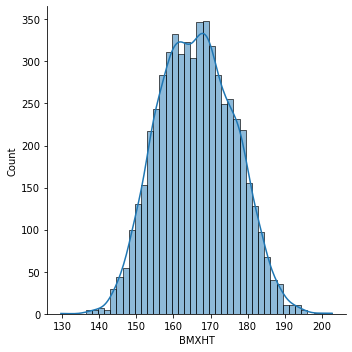

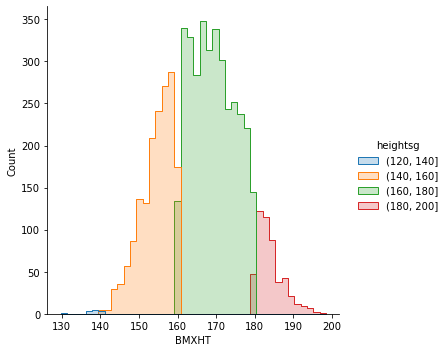

In [48]:
da["heightsg"] = pd.cut(da.BMXHT, [120, 140, 160, 180, 200]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.displot(da.BMXHT.dropna(), kde = True)
sns.displot(da, x="BMXHT", hue="heightsg", element="step", common_norm=False)

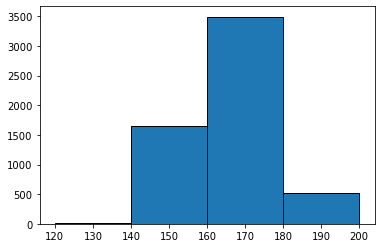

In [49]:
plt.hist(da.BMXHT, bins=[120, 140, 160, 180, 200], edgecolor="black")
plt.show()

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

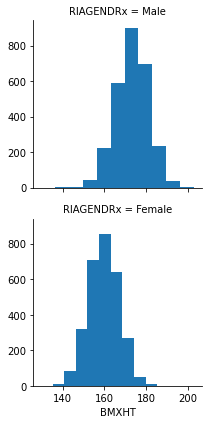

<AxesSubplot:xlabel='heightsg', ylabel='BMXHT'>

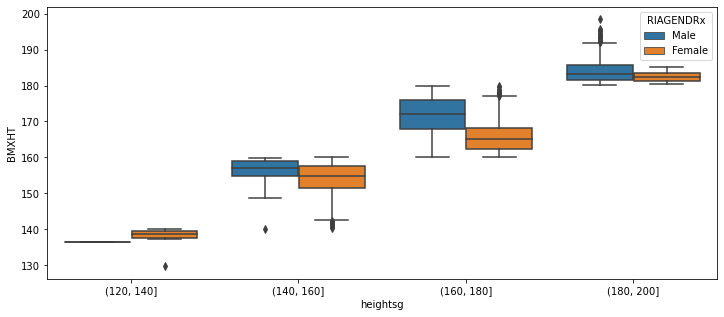

In [50]:
g = sns.FacetGrid(da, row = "RIAGENDRx")
g = g.map(plt.hist, "BMXHT") #hist = histogram
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x="heightsg", y="BMXHT", hue="RIAGENDRx", data=da)

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

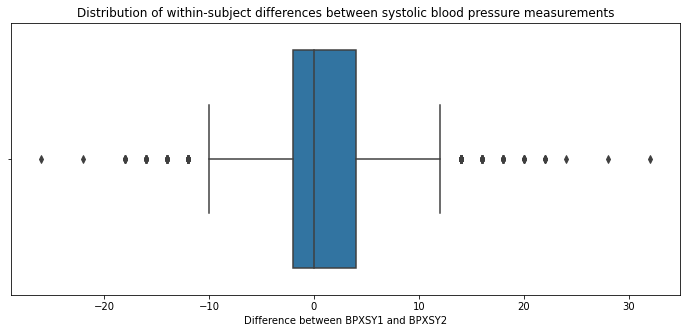

In [51]:
da['BPXSY_diff'] = da['BPXSY1'] - da['BPXSY2']

# Plot the distribution of BPXSY_diff
plt.figure(figsize=(12, 5))
sns.boxplot(x=da['BPXSY_diff'].dropna())
plt.xlabel('Difference between BPXSY1 and BPXSY2')
plt.title('Distribution of within-subject differences between systolic blood pressure measurements')
plt.show()

This code first calculates the difference between the first and second systolic blood pressure measurements, and stores the result in a new column called BPXSY_diff. Then, it creates a boxplot of the distribution of BPXSY_diff using the sns.boxplot function from the seaborn library.

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first

In [52]:
da['lower_sbp'] = (da.BPXSY1 > da.BPXSY2).astype(int)
proportion_lower_sbp = da['lower_sbp'].mean()
print("Proportion of subjects with lower SBP on second reading:", proportion_lower_sbp)

Proportion of subjects with lower SBP on second reading: 0.42946817785527464


__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

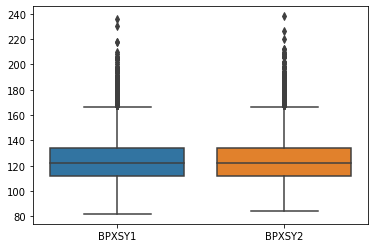

In [53]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])

## Question 5

Construct a frequency table of household [DMDHHSIZ] sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

**This code I already did it***
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")

In [54]:
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Missing             261
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [55]:
EDUH = da.groupby(['DMDEDUC2x'])['DMDHHSIZ']
EDUH = EDUH.value_counts()
EDUH = EDUH.unstack()
EDUH_result = EDUH.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(EDUH_result.to_string(float_format="%.3f"))  # Limit display to 3 decimal places
total = EDUH_result.sum()
print(total)

DMDHHSIZ            1     2     3     4     5     6     7
DMDEDUC2x                                                
9-11            0.117 0.222 0.163 0.152 0.146 0.114 0.086
<9              0.110 0.224 0.147 0.133 0.148 0.108 0.130
College         0.143 0.348 0.194 0.165 0.095 0.029 0.026
Don't know        NaN 0.667   NaN   NaN 0.333   NaN   NaN
HS/GED          0.153 0.271 0.171 0.162 0.110 0.066 0.068
Missing         0.008 0.084 0.211 0.226 0.188 0.134 0.149
Some college/AA 0.151 0.269 0.193 0.169 0.122 0.051 0.045
DMDHHSIZ
1    0.680735
2    2.085138
3    1.078841
4    1.007655
5    1.142281
6    0.501663
7    0.503686
dtype: float64


__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [56]:
EDUH_AGE = da.groupby(['agegrp', 'DMDEDUC2x'])['DMDHHSIZ']
EDUH_AGE = EDUH_AGE.value_counts()
EDUH_AGE = EDUH_AGE.unstack()
print(EDUH_AGE)

DMDHHSIZ                   1   2   3   4   5   6   7
agegrp   DMDEDUC2x                                  
(30, 40] 9-11              4  13  12  23  27  22  10
         <9                1   4  11  14  22  18  23
         College          26  47  62  82  30  11   6
         HS/GED           12  15  32  39  31  26  27
         Some college/AA  19  31  47  70  67  25  23


Remember that the important variable is the household **DMDHHSIZ**, so it will be outside all the time, because is the heart of the table

In [58]:
EDUH_AGE_GENDER = da.groupby(['agegrp', 'DMDEDUC2x', 'RIAGENDRx'])['DMDHHSIZ']
EDUH_AGE_GENDER = EDUH_AGE_GENDER.value_counts()
EDUH_AGE_GENDER = EDUH_AGE_GENDER.unstack()
print(EDUH_AGE_GENDER)

DMDHHSIZ_ONLYW = RIAGENDRw.groupby(['agegrp', 'DMDEDUC2x', 'RIAGENDRx'])['DMDHHSIZ']
DMDHHSIZ_ONLYW = DMDHHSIZ_ONLYW.median()
print(DMDHHSIZ_ONLYW)

DMDHHSIZ_ONLYM = RIAGENDRm.groupby(['agegrp', 'DMDEDUC2x','RIAGENDRx'])['DMDHHSIZ']
DMDHHSIZ_ONLYM = DMDHHSIZ_ONLYM.median()
print(DMDHHSIZ_ONLYM)

DMDHHSIZ                               1     2     3     4     5     6     7
agegrp   DMDEDUC2x       RIAGENDRx                                          
(30, 40] 9-11            Female      2.0   7.0   2.0   7.0  11.0   9.0   4.0
                         Male        2.0   6.0  10.0  16.0  16.0  13.0   6.0
         <9              Female      1.0   2.0   4.0   7.0  10.0  13.0   9.0
                         Male        NaN   2.0   7.0   7.0  12.0   5.0  14.0
         College         Female     14.0  23.0  34.0  49.0  18.0   7.0   4.0
                         Male       12.0  24.0  28.0  33.0  12.0   4.0   2.0
         HS/GED          Female      2.0   2.0  16.0  15.0  14.0  15.0  14.0
                         Male       10.0  13.0  16.0  24.0  17.0  11.0  13.0
         Some college/AA Female      2.0  16.0  29.0  43.0  42.0  12.0  15.0
                         Male       17.0  15.0  18.0  27.0  25.0  13.0   8.0
agegrp    DMDEDUC2x        RIAGENDRx
(30, 40]  9-11             Female      

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [59]:
# Create MVUs based on the combination of SDMVSTRA and SDMVPSU
da['MVU'] = da.SDMVSTRA + da.SDMVPSU

# Group the data by MVU and RIAGENDR to calculate the mean of each variable
grouped_mvu_gender = da.groupby(['MVU', 'RIAGENDRx'])
mean_by_mvu_gender = grouped_mvu_gender[['RIDAGEYR', 'BMXHT', 'BMXBMI']].mean()

# Reset the index to make it easier to work with the data
mean_by_mvu_gender = mean_by_mvu_gender.reset_index()

# Calculate the ratio of the largest mean to the smallest mean for each variable
ratios = {}
for var in ['RIDAGEYR', 'BMXHT', 'BMXBMI']:
    max_mean = mean_by_mvu_gender[var].max()
    min_mean = mean_by_mvu_gender[var].min()
    ratios[var] = max_mean / min_mean

# Print the ratios
print(ratios)

{'RIDAGEYR': 1.2415174236702988, 'BMXHT': 1.1156831181003426, 'BMXBMI': 1.1868727251805677}


In [60]:
MVU_GENDER = da.groupby(['RIAGENDRx', 'SDMVSTRA', 'SDMVPSU'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']]
MVU_GENDER_mean = MVU_GENDER.mean()
print(MVU_GENDER_mean)

print('Ratio between the largest and smallest mean of gender:' + str(max(MVU_GENDER_mean.RIDAGEYR)/min(MVU_GENDER_mean.RIDAGEYR)))
print('Ratio between the largest and smallest mean of height:' + str(max(MVU_GENDER_mean.BMXHT)/min(MVU_GENDER_mean.BMXHT)))
print('Ratio between the largest and smallest mean of BMI:' + str(max(MVU_GENDER_mean.BMXBMI)/min(MVU_GENDER_mean.BMXBMI)))


                             RIDAGEYR       BMXHT     BMXBMI
RIAGENDRx SDMVSTRA SDMVPSU                                  
Female    119      1        47.663265  159.570408  30.052041
                   2        52.987952  159.244578  27.849398
          120      1        43.636364  155.402041  32.419388
                   2        43.736111  159.218056  27.400000
          121      1        44.397959  158.871579  30.856842
                   2        44.376344  160.229032  26.470968
          122      1        42.897436  161.315385  29.447436
                   2        47.333333  157.231111  26.611111
          123      1        44.841121  162.059615  29.905769
                   2        46.457447  160.476596  30.641489
          124      1        51.664000  158.788710  29.533065
                   2        42.541667  162.853521  28.640845
          125      1        50.900901  160.762385  30.385321
                   2        51.660000  160.021429  28.564286
          126      1    

In [61]:
print(MVU_GENDER.value_counts())

RIAGENDRx  SDMVSTRA  SDMVPSU  RIDAGEYR  BMXHT  BMXBMI
Female     119       1        18        157.4  20.4      1
                                        161.6  19.3      1
                              58        148.7  23.2      1
                              56        164.1  36.3      1
                                        163.5  33.4      1
                                                        ..
Male       133       2        38        170.4  24.0      1
                              37        167.1  22.3      1
                              36        169.6  28.1      1
                              35        177.1  24.1      1
                              80        175.3  18.0      1
Length: 5662, dtype: int64


__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [63]:
print("\033[1mInter-quartile Range (IQR) of each gender for age\033[0m")

# Calculate IQR for RIDAGEYR
AGE_FEMALE = pd.DataFrame(RIAGENDRw, columns=["RIDAGEYR"])
q25 = AGE_FEMALE.quantile(0.25)
q75 = AGE_FEMALE.quantile(0.75)
AGE_FEMALE_IQR = q75 - q25
print("IQR for age in Females:", AGE_FEMALE_IQR)

AGE_MALE = pd.DataFrame(RIAGENDRm, columns=["RIDAGEYR"])
q25 = AGE_MALE.quantile(0.25)
q75 = AGE_MALE.quantile(0.75)
AGE_MALE_IQR = q75 - q25
print("IQR for age Males:", AGE_MALE_IQR)

Inter-quartile Range (IQR) of each gender for age
IQR for age in Females: RIDAGEYR    30.0
dtype: float64
IQR for age Males: RIDAGEYR    31.0
dtype: float64


In [67]:
print("\033[1mInter-quartile Range (IQR) of each gender for height\033[0m")

# Calculate IQR for BMXHT
HEIGHT_FEMALE = pd.DataFrame(RIAGENDRw, columns=["BMXHT"])
q25 = HEIGHT_FEMALE['BMXHT'].quantile(0.25)
q75 = HEIGHT_FEMALE['BMXHT'].quantile(0.75)
HEIGHT_FEMALE_IQR = q75 - q25
print("IQR for height in Females:", HEIGHT_FEMALE_IQR)

HEIGHT_MALE = pd.DataFrame(RIAGENDRm, columns=["BMXHT"])
q25 = HEIGHT_MALE['BMXHT'].quantile(0.25)
q75 = HEIGHT_MALE['BMXHT'].quantile(0.75)
HEIGHT_MALE_IQR = q75 - q25
print("IQR for height in Males:", HEIGHT_MALE_IQR)

Inter-quartile Range (IQR) of each gender for height
IQR for height in Females: 10.100000000000023
IQR for height in Males: 10.400000000000006


In [68]:
print("\033[1mInter-quartile Range (IQR) of each gender for BMI\033[0m")

# Calculate IQR for BMXBMI
BMI_FEMALE = pd.DataFrame(RIAGENDRw, columns=["BMXBMI"])
q25 = BMI_FEMALE['BMXBMI'].quantile(0.25)
q75 = BMI_FEMALE['BMXBMI'].quantile(0.75)
BMI_FEMALE_IQR = q75 - q25
print("IQR for BMI in Females:", BMI_FEMALE_IQR)

BMI_MALE = pd.DataFrame(RIAGENDRm, columns=["BMXBMI"])
q25 = BMI_MALE['BMXBMI'].quantile(0.25)
q75 = BMI_MALE['BMXBMI'].quantile(0.75)
BMI_MALE_IQR = q75 - q25
print("IQR for BMI in Males:", BMI_MALE_IQR)

Inter-quartile Range (IQR) of each gender for BMI
IQR for BMI in Females: 10.0
IQR for BMI in Males: 7.575000000000003
